In [1]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox
import matplotlib.pyplot as plt

In [2]:
#读取数据
data=pd.read_csv(r'E:\Machine Learning\used_car_train_20200313.csv',sep=' ')
Adata=pd.read_csv(r'E:\Machine Learning\used_car_testA_20200313.csv',sep=' ')

In [3]:
#删除无用属性
id_features=['SaleID','name']
data.drop(columns=id_features,inplace=True)

In [5]:
#截断处理几个异常特征
#可以看出有很多的异常值点，选择用截断的方式处理
"""这里包装了一个异常值处理的代码，可以随便调用"""
def outliers_proc(data, col_name, scale=3):
    """
        用于截尾异常值， 默认用box_plot(scale=3)进行清洗
        param:
            data：接收pandas数据格式
            col_name: pandas列名
            scale: 尺度
    """
    data_col = data[col_name]
    Q1 = data_col.quantile(0.25) # 0.25分位数
    Q3 = data_col.quantile(0.75)  # 0,75分位数
    IQR = Q3 - Q1

    data_col[data_col < Q1 - (scale * IQR)] = Q1 - (scale * IQR)
    data_col[data_col > Q3 + (scale * IQR)] = Q3 + (scale * IQR)

    return data[col_name]

data['power'] = outliers_proc(data, 'power')
data['v_2'] = outliers_proc(num_data, 'v_2')
data['v_11'] = outliers_proc(num_data, 'v_11')
data['v_12'] = outliers_proc(num_data, 'v_12')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [6]:
"""下面以power为例进行分桶， 当然构造一列新特征了"""
#数据分桶
bin = [i*20 for i in range(-1,20)]
data['power_bin'] = pd.cut(data['power'], bin, labels=False)
#定义箱子的边
bin = [0,3.5,7,10.5,15]
data['kilometer_bin'] = pd.cut(data['kilometer'], bin, labels=False)

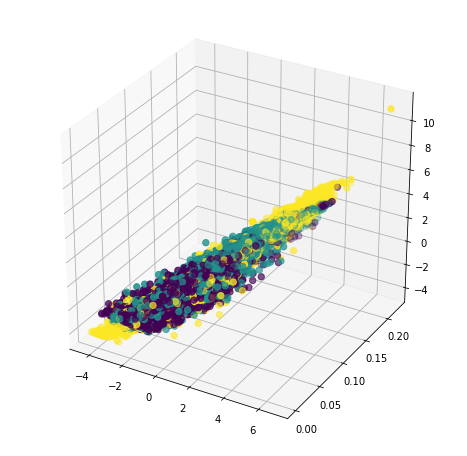

In [7]:
#从相关性最强的5个特征中，对model进行聚类（包含一个负相关）
from scipy.cluster.hierarchy import linkage, dendrogram
from mpl_toolkits.mplot3d import Axes3D
#from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
model_data=data[['v_4','v_9','v_13','brand','v_14']]
ac = KMeans(n_clusters=3)
ac.fit(model_data)

model_fea = ac.predict(model_data)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(model_data.iloc[:,0],model_data.iloc[:,1],model_data.iloc[:,2],marker='o', c=model_fea, s=40, label='class 1')
plt.show()
#可以看出预测效果很好，基本把model与原类别区分出来了

In [8]:
data['model_class']=model_fea

In [10]:
pd.set_option('display.max_columns',len(data.columns))
data.describe()


,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,power_bin,kilometer_bin,model_class
count,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.0,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,116.287353,12.597160,2583.077267,0.000007,0.0,2.016033e+07,5923.327333,44.406268,-0.044809,0.080765,0.078833,0.017875,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688,6.216587,2.560307,0.569207
std,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,67.278208,3.919576,1885.363218,0.002582,0.0,1.067328e+02,7501.998477,2.457548,3.641893,2.929618,2.026514,1.193661,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685,3.445553,0.852225,0.671843
min,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.0,2.015062e+07,11.000000,30.451976,-4.295589,-4.470671,-7.275037,-4.364565,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556,0.000000,0.000000,0.000000
25%,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,1018.000000,0.000000,0.0,2.016031e+07,1300.000000,43.135799,-3.192349,-0.970671,-1.462580,-0.921191,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034,4.000000,3.000000,0.000000
50%,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,2196.000000,0.000000,0.0,2.016032e+07,3250.000000,44.610266,-3.052671,-0.382947,0.099722,-0.075910,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246,6.000000,3.000000,0.000000
75%,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,3843.000000,0.000000,0.0,2.016033e+07,7700.000000,46.004721,4.000670,0.241335,1.565838,0.868758,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378,8.000000,3.000000,1.000000
max,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,375.000000,15.000000,8120.000000,1.000000,0.0,2.016041e+07,99999.000000,52.304178,7.320308,19.035496,9.854702,6.829352,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418,19.000000,3.000000,2.000000


In [11]:
# 1. 数值特征归一化， 因为这里数值的取值范围相差很大
data['power'] = (data['power'] - data['power'].mean()) / (data['power'].std())
data['model'] = (data['model'] - data['model'].mean()) / (data['model'].std())
data['regionCode'] = (data['regionCode'] - data['regionCode'].mean()) / (data['regionCode'].std())
data['kilometer'] = (data['kilometer'] - data['kilometer'].mean()) / (data['kilometer'].std())
data['brand'] = (data['brand'] - data['brand'].mean()) / (data['brand'].std())

In [12]:
# 这里是为了标记一下哪些字段有错误
def regDateFalse(x):
    if str(x)[4:6] == '00':
        return 1
    else: 
        return 0
data['regDateFalse'] = data['regDate'].apply(lambda x: regDateFalse(x))
# 这里是改正错误字段
def changeFalse(x):
    x = str(x)
    if x[4:6] == '00':
        x = x[0:4] + '01' + x[6:]
        x = int(x)
    return x
data['regDate'] = data['regDate'].apply(lambda x: changeFalse(x))
# 使用时间：data['creatDate'] - data['regDate']，反应汽车使用时间，一般来说价格与使用时间成反比
# 不过要注意，数据里有时间出错的格式，所以我们需要 errors='coerce'
data['used_time'] = (pd.to_datetime(data['creatDate'], format='%Y%m%d') - 
                            pd.to_datetime(data['regDate'], format='%Y%m%d')).dt.days
# 修改错误
# 但是需要加上那一个月
data.loc[data.regDateFalse==1, 'used_time'] -= 30
# 删除标记列
del data['regDateFalse']

In [13]:
data['used_time'] = data['used_time'] / 365.0
#time_data['Is_scrap'] = time_data['used_time'].apply(lambda x: 1 if x>=10 else 0)


In [26]:
bins = [0,3,5,10, 15, 20, 25]
data['estivalue'] = pd.cut(data['used_time'], bins, labels=False)

In [14]:
com_car = [2.0, 3.0, 6.0]  # 商用车
GL_car = [0.0, 4.0, 5.0]   # 豪华系列  
self_car = [1.0, 7.0]

def class_bodyType(x):
    if x in GL_car:
        return 0
    elif x in com_car:
        return 1
    else:
        return 2

data['car_class'] = data['bodyType'].apply(lambda x : class_bodyType(x))
is_fuel = [0.0, 1.0, 2.0, 3.0]
data['is_fuel'] = data['fuelType'].apply(lambda x: 1 if x in is_fuel else 0)

In [16]:
v_features = ['v_' + str(i) for i in range(15)]
data['v_sum'] = data[v_features].apply(lambda x: x.sum(), axis=1)
data['v_mean'] = data[v_features].apply(lambda x: x.mean(), axis=1)
data['v_std'] = data[v_features].apply(lambda x: x.std(), axis=1)

In [17]:
pd.set_option('display.max_columns',len(data.columns))
data.describe()

,model,brand,bodyType,fuelType,gearbox,power,kilometer,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,power_bin,kilometer_bin,model_class,used_time,estivalue,car_class,is_fuel,v_sum,v_mean,v_std
count,1.499990e+05,1.500000e+05,145494.000000,141320.000000,144019.000000,1.500000e+05,1.500000e+05,1.500000e+05,150000.000000,150000.0,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,138030.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,2.829385e-17,-1.038207e-15,1.792369,0.375842,0.224943,2.917962e-17,6.829228e-16,-2.687332e-17,0.000007,0.0,2.016033e+07,5923.327333,44.406268,-0.044809,0.080765,0.078833,0.017875,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688,6.216587,2.560307,0.569207,12.432953,3.381555,0.882873,0.940807,45.089362,3.005957,11.636207
std,1.000000e+00,1.000000e+00,1.760640,0.548677,0.417546,1.000000e+00,1.000000e+00,1.000000e+00,0.002582,0.0,1.067328e+02,7501.998477,2.457548,3.641893,2.929618,2.026514,1.193661,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685,3.445553,0.852225,0.671843,5.387826,0.911604,0.806829,0.235987,7.452767,0.496851,0.581345
min,-9.514087e-01,-1.023875e+00,0.000000,0.000000,0.000000,-1.728455e+00,-3.086344e+00,-1.370069e+00,0.000000,0.0,2.015062e+07,11.000000,30.451976,-4.295589,-4.470671,-7.275037,-4.364565,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556,0.000000,0.000000,0.000000,0.241096,0.000000,0.000000,0.000000,28.803715,1.920248,9.008036
25%,-7.495355e-01,-8.967289e-01,0.000000,0.000000,0.000000,-6.136809e-01,-2.478840e-02,-8.301198e-01,0.000000,0.0,2.016031e+07,1300.000000,43.135799,-3.192349,-0.970671,-1.462580,-0.921191,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034,4.000000,3.000000,0.000000,8.358904,3.000000,0.000000,1.000000,41.319292,2.754619,11.246529
50%,-3.457891e-01,-2.609974e-01,1.000000,0.000000,0.000000,-9.345304e-02,6.130358e-01,-2.053065e-01,0.000000,0.0,2.016032e+07,3250.000000,44.610266,-3.052671,-0.382947,0.099722,-0.075910,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246,6.000000,3.000000,0.000000,12.512329,4.000000,1.000000,1.000000,43.931521,2.928768,11.642227
75%,3.809545e-01,6.290266e-01,3.000000,1.000000,0.000000,5.010931e-01,6.130358e-01,6.682653e-01,0.000000,0.0,2.016033e+07,7700.000000,46.004721,4.000670,0.241335,1.565838,0.868758,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378,8.000000,3.000000,1.000000,16.506849,4.000000,2.000000,1.000000,46.949727,3.129982,12.032129
max,4.034860e+00,3.934830e+00,7.000000,6.000000,1.000000,3.845415e+00,6.130358e-01,2.936794e+00,1.000000,0.0,2.016041e+07,99999.000000,52.304178,7.320308,19.035496,9.854702,6.829352,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418,19.000000,3.000000,2.000000,25.265753,4.000000,2.000000,1.000000,92.597480,6.173165,14.001222


In [19]:
data['v_2'] = outliers_proc(data, 'v_2')
data['v_11'] = outliers_proc(data, 'v_11')
data['v_12'] = outliers_proc(data, 'v_12')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [20]:
data['creatDate'] = (data['creatDate'] - data['creatDate'].mean()) / (data['creatDate'].std())
del data['seller']
del data['offerType']

In [22]:
data.isnull().sum().sort_values(ascending=False)

estivalue            11970
fuelType              8680
gearbox               5981
bodyType              4506
model                    1
v_std                    0
creatDate                0
v_3                      0
v_2                      0
v_1                      0
v_0                      0
price                    0
kilometer                0
regionCode               0
notRepairedDamage        0
v_5                      0
power                    0
brand                    0
v_4                      0
v_6                      0
v_mean                   0
power_bin                0
v_sum                    0
is_fuel                  0
car_class                0
used_time                0
model_class              0
kilometer_bin            0
v_14                     0
v_7                      0
v_13                     0
v_12                     0
v_11                     0
v_10                     0
v_9                      0
v_8                      0
regDate                  0
d

In [24]:
data['estivalue']=data['estivalue'].fillna(data['estivalue'].mean())
data['fuelType']=data['fuelType'].fillna(0)
data['gearbox']=data['gearbox'].fillna(0)
data['bodyType']=data['bodyType'].fillna(data['bodyType'].mean())
data['model']=data['model'].fillna(data['model'].mean())

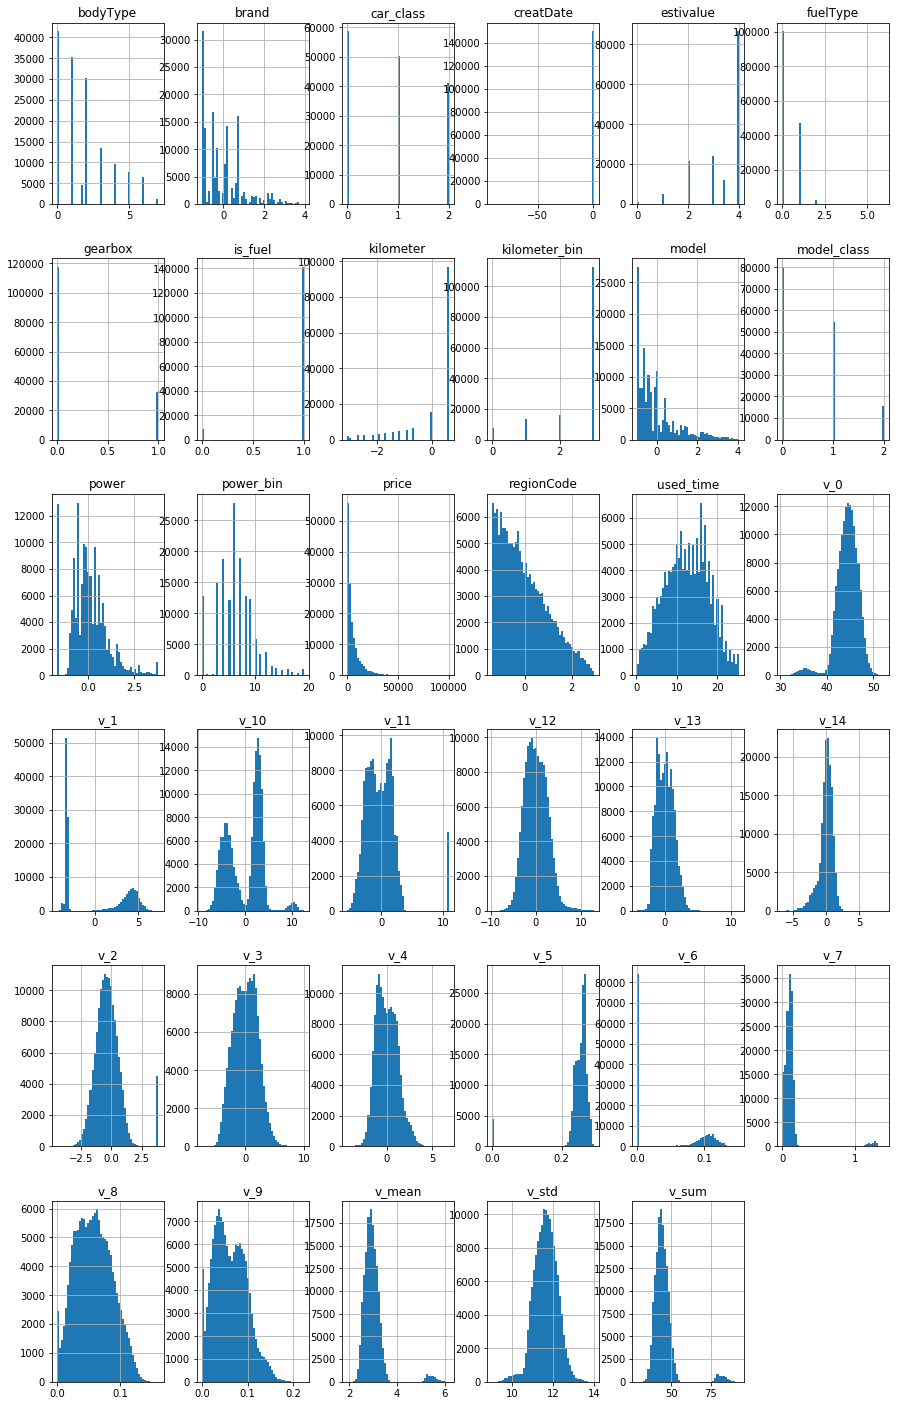

In [25]:
#这才是我们第一步需要做的，探索性分析数据，先通过图表看数据分布特征
import matplotlib.pyplot as plt
data.hist(bins=50,figsize=(15,25))#bins 柱子个数
#plt.savefig('a.jpg')  #保存图片
plt.show()

In [28]:
import lightgbm as lgb

from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

In [29]:
target=data['price']
del data['price']

In [33]:
data['notRepairedDamage'].replace('-',1,inplace=True)

In [51]:
data['notRepairedDamage'].replace('0.0',0,inplace=True)

In [52]:
data['notRepairedDamage'].value_counts()

0.0    111361
1.0     38639
Name: notRepairedDamage, dtype: int64

In [38]:
data['regDate']=data['regDate'].astype('int64')

In [39]:
data['regDate'] = (data['regDate'] - data['regDate'].mean()) / (data['regDate'].std())

In [59]:
# 加载数据
from sklearn.model_selection import cross_val_score
import numpy as np
Y=np.log(target)
X_train, X_test, y_train, y_test = train_test_split(data, Y, test_size=0.2,random_state=18)


# 创建模型，训练模型(先创建一个模型，之后再网格搜索，或者调参)

gbm = lgb.LGBMRegressor(objective='regression', num_leaves=50, learning_rate=0.1, n_estimators=500,
    min_child_samples=80,
    subsample=0.8,
    colsample_bytree=1,
    reg_alpha=0,
    reg_lambda=0,
    random_state=np.random.randint(10e6))

gbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='l2', early_stopping_rounds=20)

# 测试机预测

y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
# 模型评估

print('The rmse of prediction is:', mean_absolute_error(np.exp(y_test), np.exp(y_pred)))
# feature importances

print('Feature importances:', list(gbm.feature_importances_))

[1]	valid_0's l2: 1.21409
Training until validation scores don't improve for 20 rounds
[2]	valid_0's l2: 1.0056
[3]	valid_0's l2: 0.836052
[4]	valid_0's l2: 0.698014
[5]	valid_0's l2: 0.585838
[6]	valid_0's l2: 0.494149
[7]	valid_0's l2: 0.419592
[8]	valid_0's l2: 0.358246
[9]	valid_0's l2: 0.308325
[10]	valid_0's l2: 0.267403
[11]	valid_0's l2: 0.234054
[12]	valid_0's l2: 0.205992
[13]	valid_0's l2: 0.183518
[14]	valid_0's l2: 0.164909
[15]	valid_0's l2: 0.149735
[16]	valid_0's l2: 0.136833
[17]	valid_0's l2: 0.126294
[18]	valid_0's l2: 0.117453
[19]	valid_0's l2: 0.110245
[20]	valid_0's l2: 0.103795
[21]	valid_0's l2: 0.0983528
[22]	valid_0's l2: 0.0939384
[23]	valid_0's l2: 0.0902039
[24]	valid_0's l2: 0.0869816
[25]	valid_0's l2: 0.0841825
[26]	valid_0's l2: 0.0817235
[27]	valid_0's l2: 0.0794951
[28]	valid_0's l2: 0.0778191
[29]	valid_0's l2: 0.0763236
[30]	valid_0's l2: 0.0749788
[31]	valid_0's l2: 0.0737174
[32]	valid_0's l2: 0.0726298
[33]	valid_0's l2: 0.0714666
[34]	valid_0's

[281]	valid_0's l2: 0.0532209
[282]	valid_0's l2: 0.0532291
[283]	valid_0's l2: 0.0532291
[284]	valid_0's l2: 0.0532221
[285]	valid_0's l2: 0.0532083
[286]	valid_0's l2: 0.0532106
[287]	valid_0's l2: 0.0532141
[288]	valid_0's l2: 0.0532039
[289]	valid_0's l2: 0.0532019
[290]	valid_0's l2: 0.053193
[291]	valid_0's l2: 0.0531751
[292]	valid_0's l2: 0.0531709
[293]	valid_0's l2: 0.053186
[294]	valid_0's l2: 0.0531747
[295]	valid_0's l2: 0.0531653
[296]	valid_0's l2: 0.0531574
[297]	valid_0's l2: 0.0531675
[298]	valid_0's l2: 0.0531544
[299]	valid_0's l2: 0.0531536
[300]	valid_0's l2: 0.0531475
[301]	valid_0's l2: 0.0531229
[302]	valid_0's l2: 0.0531239
[303]	valid_0's l2: 0.0531108
[304]	valid_0's l2: 0.0530937
[305]	valid_0's l2: 0.0530865
[306]	valid_0's l2: 0.0530799
[307]	valid_0's l2: 0.0530912
[308]	valid_0's l2: 0.0530833
[309]	valid_0's l2: 0.053086
[310]	valid_0's l2: 0.0530827
[311]	valid_0's l2: 0.0530879
[312]	valid_0's l2: 0.0530867
[313]	valid_0's l2: 0.0530767
[314]	valid_0